# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from tqdm.notebook import tqdm


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create new dataframe to store the weather data
weather_df = pd.DataFrame()

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for i in tqdm(range(len(cities))):
    city_name = cities[i]
    weather_url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}'
    weather_api_data = requests.get(weather_url).json()
    if weather_api_data['cod'] == '404':
        print(f'Processing Record {(i+1)%50} of Set {int((i+1)/50)+1} | City not found. Skipping...')
        continue
    else:
        weather_df = weather_df.append([[city_name, 
                                weather_api_data['coord']['lat'],
                                weather_api_data['coord']['lon'],
                                weather_api_data['main']['temp_max'],
                                weather_api_data['main']['humidity'],
                                weather_api_data['clouds']['all'],
                                weather_api_data['wind']['speed'],
                                weather_api_data['sys']['country'],
                                weather_api_data['dt']                           
                               ]])
        print(f'Processing Record {(i+1)%50} of Set {int((i+1)/50)+1} | {city_name}')



Beginning Data Retrieval
-----------------------------


Processing Record 1 of Set 1 | talara
Processing Record 2 of Set 1 | City not found. Skipping...
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | hobyo
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | simplicio mendes
Processing Record 7 of Set 1 | broken hill
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | City not found. Skipping...
Processing Record 11 of Set 1 | padang
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | alyangula
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | vao
Processing Record 22 of Set 1 | dicabisagan
Processing Record 23 of Set 1 | jamestown
Processing Record 2

Processing Record 40 of Set 4 | mazeikiai
Processing Record 41 of Set 4 | mayo
Processing Record 42 of Set 4 | matata
Processing Record 43 of Set 4 | borujerd
Processing Record 44 of Set 4 | leh
Processing Record 45 of Set 4 | City not found. Skipping...
Processing Record 46 of Set 4 | jutai
Processing Record 47 of Set 4 | City not found. Skipping...
Processing Record 48 of Set 4 | yeppoon
Processing Record 49 of Set 4 | casino
Processing Record 0 of Set 5 | new norfolk
Processing Record 1 of Set 5 | kieta
Processing Record 2 of Set 5 | polohy
Processing Record 3 of Set 5 | misratah
Processing Record 4 of Set 5 | williams lake
Processing Record 5 of Set 5 | savinka
Processing Record 6 of Set 5 | ust-nera
Processing Record 7 of Set 5 | manokwari
Processing Record 8 of Set 5 | ixtapa
Processing Record 9 of Set 5 | khorinsk
Processing Record 10 of Set 5 | lorengau
Processing Record 11 of Set 5 | hasaki
Processing Record 12 of Set 5 | lida
Processing Record 13 of Set 5 | sola
Processing Re

Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | wakkanai
Processing Record 35 of Set 8 | City not found. Skipping...
Processing Record 36 of Set 8 | umm lajj
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | carutapera
Processing Record 40 of Set 8 | panjakent
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | gualaquiza
Processing Record 43 of Set 8 | hirado
Processing Record 44 of Set 8 | mozarlandia
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | puerto escondido
Processing Record 47 of Set 8 | babylon
Processing Record 48 of Set 8 | bwanga
Processing Record 49 of Set 8 | salina
Processing Record 0 of Set 9 | lingao
Processing Record 1 of Set 9 | lahij
Processing Record 2 of Set 9 | City not found. Skipping...
Processing Record 3 of Set 9 | honiara
Processing Record 4 of Set 9 | tazovskiy
Processing Record 5 of Set 9 | mingoyo
Processing Record 6 of

Processing Record 23 of Set 12 | tres palos
Processing Record 24 of Set 12 | bratsk
Processing Record 25 of Set 12 | labelle
Processing Record 26 of Set 12 | azare
Processing Record 27 of Set 12 | henties bay
Processing Record 28 of Set 12 | tacoronte
Processing Record 29 of Set 12 | City not found. Skipping...
Processing Record 30 of Set 12 | gravelbourg
Processing Record 31 of Set 12 | taft
Processing Record 32 of Set 12 | qorveh
Processing Record 33 of Set 12 | mehamn
Processing Record 34 of Set 12 | san patricio
Processing Record 35 of Set 12 | salinas
Processing Record 36 of Set 12 | manaus
Processing Record 37 of Set 12 | rawson
Processing Record 38 of Set 12 | penzance
Processing Record 39 of Set 12 | eyemouth
Processing Record 40 of Set 12 | simao
Processing Record 41 of Set 12 | sechura
Processing Record 42 of Set 12 | weiser
Processing Record 43 of Set 12 | berlevag
Processing Record 44 of Set 12 | City not found. Skipping...
Processing Record 45 of Set 12 | do gonbadan
Proce

In [4]:
weather_df.columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
weather_df = weather_df.reset_index(drop=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        566 non-null    object 
 1   Lat         566 non-null    float64
 2   Lng         566 non-null    float64
 3   Max Temp    566 non-null    float64
 4   Humidity    566 non-null    int64  
 5   Cloudiness  566 non-null    int64  
 6   Wind Speed  566 non-null    float64
 7   Country     566 non-null    object 
 8   Date        566 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.9+ KB


In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talara,-4.58,-81.27,296.32,79,16,7.11,PE,1588978140
1,hithadhoo,-0.60,73.08,302.45,78,84,7.55,MV,1588978184
2,hobyo,5.35,48.53,302.12,75,0,4.31,SO,1588978184
3,provideniya,64.38,-173.30,278.96,65,97,7.18,RU,1588978185
4,simplicio mendes,-7.85,-41.91,296.77,90,100,1.66,BR,1588978185


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.450866,18.460813,290.121908,70.701413,51.072438,3.563163,1.588978e+09
std,33.647259,92.164335,9.753002,21.160095,37.559299,2.431540,9.762089e+01
min,-54.800000,-175.200000,258.000000,4.000000,0.000000,0.150000,1.588978e+09
25%,-9.437500,-63.097500,283.150000,60.000000,12.250000,1.740000,1.588978e+09
50%,22.470000,25.220000,291.135000,76.000000,54.000000,3.100000,1.588978e+09
75%,49.027500,100.347500,298.355000,87.000000,90.000000,4.997500,1.588978e+09
max,78.220000,179.320000,312.590000,100.000000,100.000000,19.500000,1.588978e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

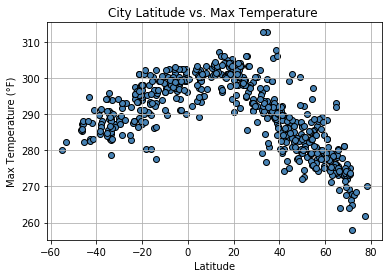

In [24]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Max Temperature ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

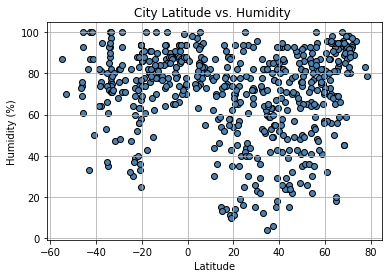

In [25]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

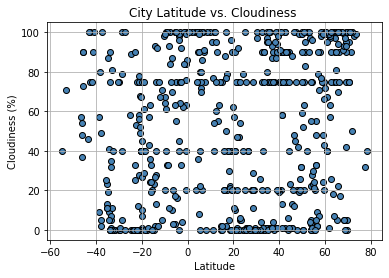

In [26]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Cloudiness ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

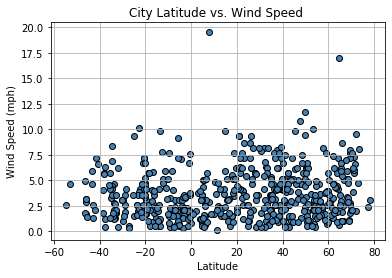

In [27]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots
def liner_reg(input_df, x, y) -> tuple:
    x_values = input_df[x].astype('float')
    y_values = input_df[y].astype('float')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (line_eq, x_values, regress_values, rvalue)

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_index = (weather_df['Lat'] >= 0)
northern_weather_df = weather_df.loc[northern_index,:]

In [30]:
southern_index = (weather_df['Lat'] < 0)
southern_weather_df = weather_df.loc[southern_index,:]

In [57]:
def plot_lin_reg(temp_df, ax, ay, py, py_label):
    """ Plot the"""
    plt.scatter(temp_df['Lat'], temp_df[py], c='steelblue', edgecolors='black')
    plt.xlabel('Latitude')
    plt.ylabel(py_label)

    # Plot regression line
    (line_eq, x_values, regress_values, rvalue) = liner_reg(temp_df, 'Lat', py)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(ax,ay),fontsize=15,color="red")
    print(f"R squared: {rvalue**2}")
    plt.show()
    return 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7311331549962535


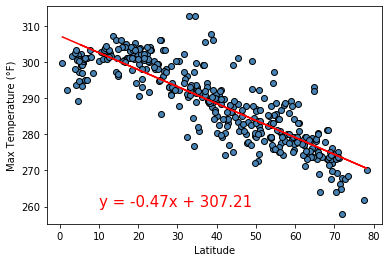

In [58]:
plot_lin_reg(northern_weather_df, 10, 260, 'Max Temp', 'Max Temperature (°F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5027344180082456


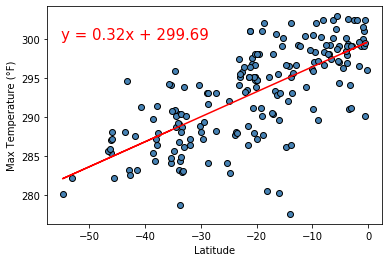

In [59]:
plot_lin_reg(southern_weather_df, -55, 300, 'Max Temp', 'Max Temperature (°F)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.016756274455325928


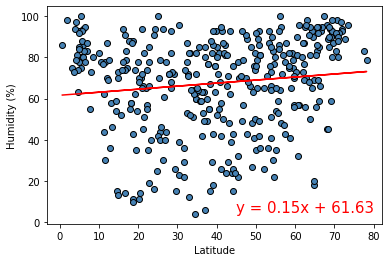

In [62]:
plot_lin_reg(northern_weather_df, 45, 5, 'Humidity', 'Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.033871106095169634


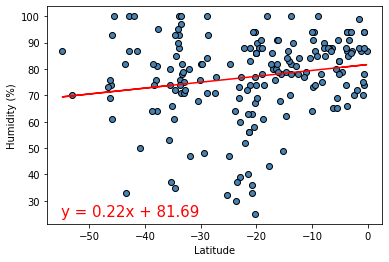

In [65]:
plot_lin_reg(southern_weather_df, -55, 24, 'Humidity', 'Humidity (%)')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.017684953520138068


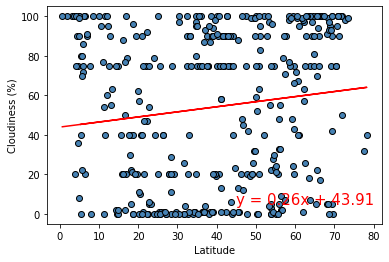

In [67]:
plot_lin_reg(northern_weather_df, 45, 5, 'Cloudiness', 'Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.027019056828872512


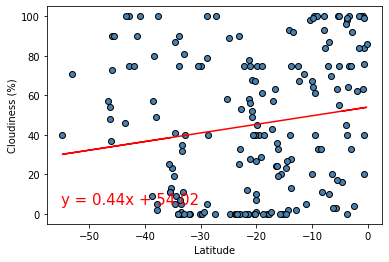

In [68]:
plot_lin_reg(southern_weather_df, -55, 5, 'Cloudiness', 'Cloudiness (%)')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.005220756562517163


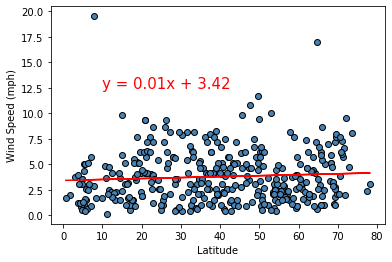

In [70]:
plot_lin_reg(northern_weather_df, 10, 12.5, 'Wind Speed', 'Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.00892325976166902


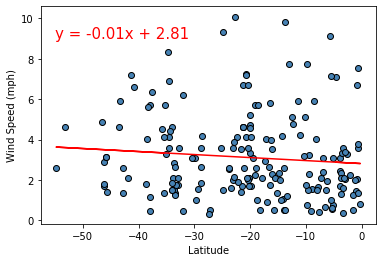

In [73]:
plot_lin_reg(southern_weather_df, -55, 9, 'Wind Speed', 'Wind Speed (mph)')